# **Importing Libraries**

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
import time
import requests
import google.generativeai as genai
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.cluster import KMeans
from flask import Flask, render_template
from PIL import Image
import requests
from io import BytesIO
import openai
import torch
from diffusers import StableDiffusionPipeline

# **Weather Based Outfit Suggestion**

In [2]:
hot_sunny = {
    "Kids": {
        "Male": {
            "Minimalist": [
                ("White Cotton T-shirt", "Beige Shorts"),
                ("Linen Tank Top", "Soft Jersey Joggers"),
                ("Sleeveless Polo", "Denim Shorts"),
                ("Breathable Tee", "Light Grey Track Pants"),
                ("Casual Shirt", "Navy Blue Shorts")
            ],
            "Boho": [
                ("Printed Cotton Kurta", "Loose Linen Shorts"),
                ("Bohemian Shirt", "Soft Khaki Pants"),
                ("Ethnic Tunic", "White Cotton Capris"),
                ("Flowy Sleeveless Top", "Striped Joggers"),
                ("Pastel Loose Shirt", "Pleated Beige Shorts")
            ],
            "Streetwear": [
                ("Graphic Tank Top", "Cargo Shorts"),
                ("Oversized Hoodie", "Track Pants"),
                ("Loose Black Tee", "Cuffed Denim Shorts"),
                ("Tie-dye Polo", "Joggers"),
                ("Sporty Mesh Tee", "Basketball Shorts")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Sleeveless Cotton Dress", "Sandals"),
                ("Plain Crop Top", "Denim Shorts"),
                ("Floral Blouse", "Pastel Leggings"),
                ("Tank Top", "Casual Skirt"),
                ("Lace-Trimmed Top", "Cotton Capris")
            ],
            "Boho": [
                ("Flowy Tunic", "Pleated Skirt"),
                ("Bohemian Wrap Dress", "Flat Sandals"),
                ("Tie-dye Maxi Dress", "Ankle Boots"),
                ("Layered Ruffle Top", "Relaxed Linen Pants"),
                ("Frilled Blouse", "Printed Shorts")
            ],
            "Streetwear": [
                ("Graphic Crop Tee", "High-Waisted Shorts"),
                ("Hooded Tank Top", "Biker Shorts"),
                ("Oversized Band Tee", "Distressed Jeans"),
                ("Neon Sleeveless Top", "Joggers"),
                ("Sporty Zip-up Vest", "Cargo Pants")
            ]
        }
    },
    "Teen": {
        "Male": {
            "Minimalist": [
                ("Linen Polo", "Chino Shorts"),
                ("Pastel Shirt", "Slim-fit Trousers"),
                ("White Tee", "Rolled-up Denim"),
                ("Loose Button-up", "Cotton Capris"),
                ("Neutral-Tone Sweatshirt", "Casual Shorts")
            ],
            "Boho": [
                ("Floral Short-sleeve Shirt", "Relaxed Pants"),
                ("Flowy Tunic", "Slim Fit Joggers"),
                ("Ethnic Print Hoodie", "Cargo Pants"),
                ("Layered Sleeveless Shirt", "Soft Denim"),
                ("Crochet Top", "Wide-leg Pants")
            ],
            "Streetwear": [
                ("Boxy Fit Tee", "Black Joggers"),
                ("Sporty Mesh Tee", "Basketball Shorts"),
                ("Graphic Sweatshirt", "Track Pants"),
                ("Oversized Hoodie", "Slim Jeans"),
                ("Cargo Vest", "Loose Denim")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Off-shoulder Blouse", "Short Denim Skirt"),
                ("Plain Crop Tee", "Mom Jeans"),
                ("Slim-fit Tank Top", "Pleated Skirt"),
                ("Satin Slip Dress", "Minimalist Sandals"),
                ("Casual Wrap Dress", "White Sneakers")
            ],
            "Boho": [
                ("Embroidered Tunic", "Ruffled Shorts"),
                ("Flowy Maxi Skirt", "Lace-up Top"),
                ("Loose Knit Cardigan", "Cotton Culottes"),
                ("Bohemian Dress", "Strappy Flats"),
                ("Tiered Wrap Skirt", "Bralette Top")
            ],
            "Streetwear": [
                ("Graphic Oversized Hoodie", "Biker Shorts"),
                ("Sporty Tank Top", "Cargo Pants"),
                ("Neon Windbreaker", "Slim-fit Joggers"),
                ("Baseball Jacket", "Loose Denim"),
                ("Cropped Hoodie", "Baggy Jeans")
            ]
        }
    },
    "Adult": {
        "Male": {
            "Minimalist": [
                ("Linen Shirt", "Relaxed-fit Chinos"),
                ("Neutral Polo", "Slim Trousers"),
                ("Simple Cotton Tee", "Denim Shorts"),
                ("Loose-fitting Cotton Blazer", "Tailored Pants"),
                ("Breathable Pastel Shirt", "Linen Trousers")
            ],
            "Boho": [
                ("Bohemian Open Shirt", "Rolled-up Denim"),
                ("Floral-printed Tunic", "Relaxed-fit Chinos"),
                ("Layered Cotton Jacket", "Soft Linen Pants"),
                ("Beige Henley Shirt", "Loose Joggers"),
                ("Earth-tone Poncho", "Wide-leg Pants")
            ],
            "Streetwear": [
                ("Oversized Tee", "Cargo Shorts"),
                ("Sporty Zip-up Hoodie", "Slim Joggers"),
                ("Tie-Dye Polo", "Rolled-up Pants"),
                ("Fitted Mesh Tank", "Relaxed-fit Jeans"),
                ("Neon Baseball Jacket", "Slim-fit Denim")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Light Blouse", "Cotton Skirt"),
                ("Simple Maxi Dress", "Flat Sandals"),
                ("Chic Shirt Dress", "White Sneakers"),
                ("High-waist Culottes", "Silk Top"),
                ("Lace-trimmed Crop Blouse", "Denim Pants")
            ],
            "Boho": [
                ("Embroidered Maxi Skirt", "Knitted Crop Top"),
                ("Rustic Wrap Dress", "Leather Sandals"),
                ("Tiered Maxi Dress", "Flat Mules"),
                ("Flowy Layered Kimono", "Printed Shorts"),
                ("Loose Knit Top", "Wide Palazzo Pants")
            ],
            "Streetwear": [
                ("Cropped Graphic Hoodie", "Cargo Pants"),
                ("Oversized Jacket", "Biker Shorts"),
                ("Sporty Windbreaker", "High-waisted Denim"),
                ("Ripped Band Tee", "Distressed Jeans"),
                ("Boxy Fit Tank", "Slim Cargo Joggers")
            ]
        }
    },
    "Senior": {
        "Male": {
            "Minimalist": [
                ("Cotton Polo", "Relaxed Chinos"),
                ("Neutral Pastel Shirt", "Light Linen Pants"),
                ("Soft Short-sleeve Shirt", "Stretch Trousers"),
                ("Loose Breathable Blazer", "Tailored Pants"),
                ("Half-sleeve Tunic", "Soft Joggers")
            ],
            "Boho": [
                ("Layered Cotton Vest", "Linen Shorts"),
                ("Rustic Printed Tunic", "Relaxed Trousers"),
                ("Knitted Cardigan", "Wide-fit Cotton Pants"),
                ("Ethnic Open Shirt", "Stretch Denim"),
                ("Flowy Poncho", "Loose Lounge Pants")
            ],
            "Streetwear": [
                ("Boxy Fit Sweatshirt", "Cargo Joggers"),
                ("Oversized Hoodie", "Track Pants"),
                ("Sporty Windbreaker", "Loose Denim"),
                ("Zipped Polo", "Slim-fit Cargo"),
                ("Loose-fit Graphic Shirt", "Tapered Jeans")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Breathable Sundress", "Comfy Sandals"),
                ("Loose Tunic", "Wide-leg Pants"),
                ("Light Silk Wrap", "Tailored Skirt"),
                ("Floral Shirt Dress", "Walking Sneakers"),
                ("Neutral Blouse", "Relaxed-fit Jeans")
            ],
            "Boho": [
                ("Layered Cotton Maxi Dress", "Flat Loafers"),
                ("Frilled Tunic", "Stretch Capris"),
                ("Loose Peasant Dress", "Bohemian Scarf"),
                ("Rustic Cardigan", "Relaxed Pants"),
                ("Flowy Kimono", "Pleated Skirt")
            ],
            "Streetwear": [
                ("Oversized Pullover", "Joggers"),
                ("Zip-up Hoodie", "Cargo Pants"),
                ("Sporty Windbreaker", "Slim Trousers"),
                ("Relaxed Graphic Tee", "Soft Denim"),
                ("Boxy Fit Jacket", "Baggy Track Pants")
            ]
        }
    }
}

In [3]:
mild_pleasant = {
    "Kids": {
        "Male": {
            "Minimalist": [
                ("Cotton Polo Shirt", "Chino Shorts"),
                ("Light Hoodie", "Denim Jeans"),
                ("Breathable Crewneck Tee", "Relaxed Joggers"),
                ("Soft Flannel Shirt", "Tailored Pants"),
                ("Simple Sweatshirt", "Slim Trousers")
            ],
            "Boho": [
                ("Layered Cotton Shirt", "Linen Shorts"),
                ("Relaxed-fit Tunic", "Soft Joggers"),
                ("Printed Kimono-style Jacket", "Loose Denim"),
                ("Flowy Embroidered Shirt", "Cargo Pants"),
                ("Bohemian Sweater", "Stretch Trousers")
            ],
            "Streetwear": [
                ("Graphic Tee", "Cargo Joggers"),
                ("Sporty Zip-up Jacket", "Track Pants"),
                ("Oversized Sweatshirt", "Denim Shorts"),
                ("Athletic Bomber Jacket", "Slim Fit Jeans"),
                ("Loose Hoodie", "Biker Shorts")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Knit Sweater", "Denim Skirt"),
                ("Floral Wrap Dress", "Flat Sandals"),
                ("Cotton Tunic", "Pleated Skirt"),
                ("Relaxed Blouse", "High-waist Shorts"),
                ("Simple Tank Top", "Culottes")
            ],
            "Boho": [
                ("Frilled Maxi Dress", "Flat Loafers"),
                ("Flowy Printed Tunic", "Loose Trousers"),
                ("Layered Lace Blouse", "Wide-leg Pants"),
                ("Bohemian Cardigan", "Stretch Capris"),
                ("Patchwork Top", "A-line Skirt")
            ],
            "Streetwear": [
                ("Cropped Hoodie", "Biker Shorts"),
                ("Graphic Sweatshirt", "Distressed Jeans"),
                ("Oversized Windbreaker", "Cargo Pants"),
                ("Sporty Zip-up Jacket", "Joggers"),
                ("Boxy Fit Tee", "Baggy Jeans")
            ]
        }
    },
    "Teens": {
        "Male": {
            "Minimalist": [
                ("Breathable Polo", "Slim-fit Chinos"),
                ("Fitted Crewneck Sweater", "Tailored Denim"),
                ("Soft Flannel Shirt", "Relaxed Joggers"),
                ("Neutral-tone Henley", "Linen Shorts"),
                ("Casual Sweatshirt", "Slim Trousers")
            ],
            "Boho": [
                ("Printed Open Shirt", "Loose Denim"),
                ("Layered Poncho", "Soft Fit Pants"),
                ("Earth-tone Tunic", "Relaxed Cargo Pants"),
                ("Embroidered Vest", "Wide-leg Trousers"),
                ("Light Linen Blazer", "Cotton Joggers")
            ],
            "Streetwear": [
                ("Sporty Mesh Jacket", "Track Pants"),
                ("Zipped Hoodie", "Cargo Shorts"),
                ("Oversized Crewneck", "Slim Joggers"),
                ("Baseball Jacket", "Relaxed Denim"),
                ("Boxy Fit Tee", "Biker Jeans")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Light Blouse", "Denim Skirt"),
                ("Flowy Midi Dress", "Flat Sandals"),
                ("Casual Wrap Top", "Pleated Pants"),
                ("Simple Tank Top", "High-waist Shorts"),
                ("Chic Knit Sweater", "Stretch Capris")
            ],
            "Boho": [
                ("Loose Cardigan", "Maxi Skirt"),
                ("Bohemian Blouse", "Soft Denim"),
                ("Flowy Layered Dress", "Strappy Flats"),
                ("Fringed Wrap Blouse", "Culottes"),
                ("Printed Kimono", "Loose Trousers")
            ],
            "Streetwear": [
                ("Graphic Hoodie", "Biker Shorts"),
                ("Oversized Sweatshirt", "Distressed Jeans"),
                ("Sporty Windbreaker", "Cargo Joggers"),
                ("Boxy Fit Jacket", "Slim Fit Pants"),
                ("Cropped Tee", "Baggy Joggers")
            ]
        }
    },
    "Adults": {
        "Male": {
            "Minimalist": [
                ("Breathable Cotton Blazer", "Chino Pants"),
                ("Soft Crewneck Sweater", "Linen Trousers"),
                ("Slim-fit Polo", "Tailored Denim"),
                ("Casual Button-down Shirt", "Relaxed Chinos"),
                ("Light Henley Tee", "Cotton Joggers")
            ],
            "Boho": [
                ("Relaxed Linen Shirt", "Loose Denim"),
                ("Layered Ethnic Vest", "Soft Fit Trousers"),
                ("Rustic Cotton Blazer", "Wide-leg Pants"),
                ("Fringed Open Shirt", "Cargo Pants"),
                ("Printed Wrap Tunic", "Cotton Shorts")
            ],
            "Streetwear": [
                ("Sporty Mesh Hoodie", "Track Pants"),
                ("Graphic Zipped Jacket", "Slim Fit Denim"),
                ("Oversized Sweatshirt", "Biker Joggers"),
                ("Baseball Jacket", "Loose Cargo Pants"),
                ("Boxy Fit Tee", "Distressed Jeans")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Light Sweater", "Tailored Pants"),
                ("Casual Maxi Dress", "White Sneakers"),
                ("Chic Blazer", "High-waisted Denim"),
                ("Soft Wrap Blouse", "Culottes"),
                ("Floral Wrap Dress", "Flat Sandals")
            ],
            "Boho": [
                ("Flowy Kimono", "Printed Shorts"),
                ("Layered Cotton Maxi Dress", "Loafers"),
                ("Fringed Wrap Top", "Stretch Capris"),
                ("Loose Bohemian Blouse", "Relaxed Fit Pants"),
                ("Rustic Cardigan", "Pleated Skirt")
            ],
            "Streetwear": [
                ("Cropped Graphic Hoodie", "Cargo Joggers"),
                ("Oversized Bomber Jacket", "Biker Shorts"),
                ("Sporty Windbreaker", "High-waisted Denim"),
                ("Ripped Band Tee", "Distressed Jeans"),
                ("Boxy Fit Tank", "Slim Cargo Pants")
            ]
        }
    },
    "Senior": {
        "Male": {
            "Minimalist": [
                ("Soft Cotton Polo", "Relaxed Chinos"),
                ("Lightweight Cardigan", "Linen Trousers"),
                ("Breathable Long-sleeve Shirt", "Stretch Denim"),
                ("Neutral Blazer", "Tailored Pants"),
                ("Half-sleeve Knit Shirt", "Soft Joggers")
            ],
            "Boho": [
                ("Layered Cotton Vest", "Linen Shorts"),
                ("Relaxed Fit Tunic", "Cargo Trousers"),
                ("Light Knitted Cardigan", "Soft Fit Pants"),
                ("Printed Open Shirt", "Stretch Denim"),
                ("Loose Bohemian Blazer", "Wide-leg Trousers")
            ],
            "Streetwear": [
                ("Boxy Fit Sweatshirt", "Cargo Joggers"),
                ("Sporty Windbreaker", "Relaxed Denim"),
                ("Oversized Hoodie", "Track Pants"),
                ("Graphic Zipped Polo", "Slim Cargo Pants"),
                ("Loose-fit Jacket", "Tapered Jeans")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Breathable Wrap Dress", "Flat Loafers"),
                ("Loose Tunic", "Wide-leg Pants"),
                ("Light Silk Blouse", "Tailored Skirt"),
                ("Floral Shirt Dress", "Walking Sneakers"),
                ("Relaxed Cardigan", "Stretch Jeans")
            ],
            "Boho": [
                ("Layered Maxi Dress", "Flat Sandals"),
                ("Flowy Tunic", "Soft Fit Capris"),
                ("Peasant Blouse", "Pleated Skirt"),
                ("Rustic Wrap Top", "Relaxed Trousers"),
                ("Loose Knit Sweater", "Wide Palazzo Pants")
            ],
            "Streetwear": [
                ("Oversized Pullover", "Joggers"),
                ("Zip-up Hoodie", "Cargo Pants"),
                ("Sporty Windbreaker", "Slim Trousers"),
                ("Relaxed Graphic Tee", "Soft Denim"),
                ("Boxy Fit Jacket", "Baggy Track Pants")
            ]
        }
    }
}



In [4]:
windy = {
    "Kids": {
        "Male": {
            "Minimalist": [
                ("Light Windbreaker", "Cotton Joggers"),
                ("Soft Knit Sweater", "Denim Jeans"),
                ("Fleece Hoodie", "Chino Pants"),
                ("Casual Long-sleeve Shirt", "Relaxed Joggers"),
                ("Breathable Zip-up Jacket", "Cargo Pants")
            ],
            "Boho": [
                ("Layered Tunic", "Loose Denim"),
                ("Printed Cotton Cardigan", "Relaxed Trousers"),
                ("Knitted Pullover", "Linen Joggers"),
                ("Bohemian Poncho", "Soft Fit Pants"),
                ("Fringed Jacket", "Wide-leg Cargo Pants")
            ],
            "Streetwear": [
                ("Oversized Hoodie", "Track Pants"),
                ("Sporty Windbreaker", "Cargo Joggers"),
                ("Graphic Crewneck Sweatshirt", "Biker Jeans"),
                ("Zipped Bomber Jacket", "Slim Fit Pants"),
                ("Padded Vest", "Relaxed Denim")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Longline Cardigan", "Pleated Skirt"),
                ("Soft Hoodie", "Cotton Leggings"),
                ("Chic Sweater Dress", "Knee-high Socks"),
                ("Casual Knit Sweater", "Denim Pants"),
                ("Relaxed Wrap Blouse", "Slim Fit Joggers")
            ],
            "Boho": [
                ("Embroidered Jacket", "Loose Fit Trousers"),
                ("Frilled Poncho", "Culottes"),
                ("Flowy Tunic", "Bohemian Printed Skirt"),
                ("Layered Wrap Blouse", "Stretch Capris"),
                ("Rustic Wool Cardigan", "Relaxed Fit Pants")
            ],
            "Streetwear": [
                ("Cropped Sweatshirt", "High-waisted Joggers"),
                ("Graphic Hoodie", "Cargo Pants"),
                ("Sporty Zip-up Jacket", "Track Pants"),
                ("Oversized Windbreaker", "Distressed Jeans"),
                ("Baseball Jacket", "Baggy Joggers")
            ]
        }
    },
    "Teens": {
        "Male": {
            "Minimalist": [
                ("Slim-fit Trench Coat", "Tailored Pants"),
                ("Fleece-lined Hoodie", "Denim Jeans"),
                ("Lightweight Puffer Jacket", "Chino Joggers"),
                ("Casual Knit Sweater", "Cargo Pants"),
                ("Breathable Pullover", "Relaxed Denim")
            ],
            "Boho": [
                ("Layered Poncho", "Loose Trousers"),
                ("Flowy Printed Kimono", "Cotton Joggers"),
                ("Rustic Open Cardigan", "Stretch Denim"),
                ("Embroidered Hoodie", "Soft Fit Cargo Pants"),
                ("Bohemian Wool Coat", "Relaxed Fit Pants")
            ],
            "Streetwear": [
                ("Oversized Hoodie", "Slim Fit Joggers"),
                ("Sporty Puffer Vest", "Cargo Jeans"),
                ("Graphic Crewneck", "Biker Joggers"),
                ("Windbreaker Jacket", "Track Pants"),
                ("Zipped Bomber Jacket", "Relaxed Denim")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Chic Wool Blazer", "Tailored Pants"),
                ("Oversized Knit Sweater", "Slim Fit Jeans"),
                ("Casual Trench Coat", "Culottes"),
                ("Longline Cardigan", "Pleated Skirt"),
                ("Soft Wrap Blouse", "Relaxed Fit Pants")
            ],
            "Boho": [
                ("Layered Poncho", "Maxi Skirt"),
                ("Loose Fit Wrap Top", "Soft Fit Capris"),
                ("Bohemian Wool Coat", "Printed Shorts"),
                ("Embroidered Tunic", "Wide-leg Pants"),
                ("Rustic Knit Sweater", "Relaxed Joggers")
            ],
            "Streetwear": [
                ("Cropped Oversized Hoodie", "Cargo Pants"),
                ("Sporty Windbreaker", "High-waisted Denim"),
                ("Graphic Bomber Jacket", "Distressed Jeans"),
                ("Oversized Crewneck", "Joggers"),
                ("Boxy Fit Tank", "Biker Shorts")
            ]
        }
    },
    "Adults": {
        "Male": {
            "Minimalist": [
                ("Breathable Wool Blazer", "Tailored Chinos"),
                ("Fleece-lined Trench Coat", "Denim Jeans"),
                ("Lightweight Puffer Jacket", "Relaxed Fit Joggers"),
                ("Soft Cotton Sweater", "Cargo Pants"),
                ("Knit Turtleneck", "Slim Fit Denim")
            ],
            "Boho": [
                ("Rustic Open Cardigan", "Wide-leg Pants"),
                ("Layered Poncho", "Relaxed Cargo Pants"),
                ("Printed Bohemian Blazer", "Stretch Trousers"),
                ("Flowy Cotton Jacket", "Soft Fit Denim"),
                ("Embroidered Hoodie", "Relaxed Joggers")
            ],
            "Streetwear": [
                ("Oversized Hoodie", "Cargo Joggers"),
                ("Sporty Zip-up Jacket", "Track Pants"),
                ("Graphic Crewneck", "Slim Fit Jeans"),
                ("Windbreaker Coat", "Loose Denim"),
                ("Zipped Puffer Vest", "Biker Joggers")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Elegant Wool Coat", "High-waisted Denim"),
                ("Casual Trench Coat", "Tailored Pants"),
                ("Soft Knit Sweater", "Pleated Skirt"),
                ("Longline Cardigan", "Stretch Trousers"),
                ("Chic Wrap Dress", "Flat Ankle Boots")
            ],
            "Boho": [
                ("Fringed Poncho", "Bohemian Printed Skirt"),
                ("Layered Wool Cardigan", "Loose Fit Pants"),
                ("Rustic Knit Blouse", "Relaxed Fit Capris"),
                ("Embroidered Jacket", "Soft Joggers"),
                ("Flowy Kimono", "Pleated Skirt")
            ],
            "Streetwear": [
                ("Cropped Sweatshirt", "Cargo Pants"),
                ("Graphic Oversized Hoodie", "Distressed Jeans"),
                ("Sporty Bomber Jacket", "High-waisted Denim"),
                ("Windbreaker Zip-up", "Biker Joggers"),
                ("Boxy Fit Jacket", "Slim Cargo Pants")
            ]
        }
    },
    "Senior": {
        "Male": {
            "Minimalist": [
                ("Soft Wool Cardigan", "Relaxed Chinos"),
                ("Fleece-lined Pullover", "Linen Trousers"),
                ("Casual Blazer", "Tailored Pants"),
                ("Breathable Knit Sweater", "Stretch Denim"),
                ("Light Trench Coat", "Soft Fit Joggers")
            ],
            "Boho": [
                ("Layered Wool Vest", "Linen Trousers"),
                ("Rustic Knit Blazer", "Relaxed Fit Pants"),
                ("Embroidered Poncho", "Cargo Joggers"),
                ("Flowy Cotton Cardigan", "Loose Fit Denim"),
                ("Bohemian Open Jacket", "Wide-leg Trousers")
            ],
            "Streetwear": [
                ("Boxy Fit Hoodie", "Cargo Pants"),
                ("Sporty Windbreaker", "Relaxed Denim"),
                ("Oversized Pullover", "Joggers"),
                ("Zipped Bomber Jacket", "Soft Fit Cargo"),
                ("Loose-fit Jacket", "Tapered Jeans")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Breathable Wool Coat", "Tailored Pants"),
                ("Soft Knit Sweater", "Relaxed Fit Denim"),
                ("Elegant Trench Coat", "Pleated Skirt"),
                ("Light Cardigan", "Wide-leg Pants"),
                ("Chic Wrap Dress", "Flat Loafers")
            ],
            "Boho": [
                ("Layered Maxi Dress", "Flat Sandals"),
                ("Rustic Wool Poncho", "Soft Fit Capris"),
                ("Flowy Tunic", "Relaxed Fit Pants"),
                ("Loose Knit Sweater", "Pleated Skirt"),
                ("Embroidered Wrap Top", "Wide Palazzo Pants")
            ],
            "Streetwear": [
                ("Oversized Zip-up Hoodie", "Joggers"),
                ("Sporty Windbreaker", "Cargo Pants"),
                ("Graphic Sweatshirt", "Distressed Denim"),
                ("Boxy Fit Jacket", "Baggy Track Pants"),
                ("Relaxed Fit Tee", "Biker Joggers")
            ]
        }
    }
}


In [5]:
rainy = {
    "Kids": {
        "Male": {
            "Minimalist": [
                ("Waterproof Hooded Jacket", "Cotton Joggers"),
                ("Light Raincoat", "Denim Jeans"),
                ("Windbreaker with Hood", "Stretch Pants"),
                ("Breathable Pullover", "Cargo Pants"),
                ("Soft Hoodie", "Water-resistant Track Pants")
            ],
            "Boho": [
                ("Layered Poncho", "Relaxed Fit Jeans"),
                ("Knitted Pullover", "Soft Corduroy Pants"),
                ("Waterproof Cardigan", "Loose Denim"),
                ("Printed Raincoat", "Cotton Joggers"),
                ("Fringed Hoodie", "Wide-leg Cargo Pants")
            ],
            "Streetwear": [
                ("Oversized Rain Jacket", "Track Pants"),
                ("Sporty Waterproof Hoodie", "Joggers"),
                ("Graphic Sweatshirt", "Biker Jeans"),
                ("Zipped Bomber Jacket", "Slim Fit Cargo Pants"),
                ("Padded Vest", "Relaxed Denim")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Long Waterproof Coat", "Pleated Skirt"),
                ("Soft Hoodie", "Cotton Leggings"),
                ("Chic Raincoat", "Denim Pants"),
                ("Casual Knit Sweater", "Stretch Joggers"),
                ("Relaxed Pullover", "High-waist Jeans")
            ],
            "Boho": [
                ("Embroidered Waterproof Poncho", "Loose Fit Trousers"),
                ("Frilled Raincoat", "Culottes"),
                ("Flowy Tunic", "Bohemian Printed Leggings"),
                ("Layered Wrap Blouse", "Stretch Capris"),
                ("Rustic Cardigan", "Relaxed Fit Pants")
            ],
            "Streetwear": [
                ("Cropped Rain Jacket", "High-waisted Joggers"),
                ("Graphic Hoodie", "Cargo Pants"),
                ("Sporty Zip-up Jacket", "Track Pants"),
                ("Oversized Waterproof Windbreaker", "Distressed Jeans"),
                ("Baseball Jacket", "Baggy Joggers")
            ]
        }
    },
    "Teens": {
        "Male": {
            "Minimalist": [
                ("Waterproof Trench Coat", "Tailored Pants"),
                ("Fleece-lined Hoodie", "Denim Jeans"),
                ("Light Raincoat", "Chino Joggers"),
                ("Casual Knit Sweater", "Cargo Pants"),
                ("Breathable Pullover", "Relaxed Denim")
            ],
            "Boho": [
                ("Layered Poncho", "Loose Trousers"),
                ("Flowy Printed Kimono", "Cotton Joggers"),
                ("Rustic Open Cardigan", "Stretch Denim"),
                ("Embroidered Hoodie", "Soft Fit Cargo Pants"),
                ("Bohemian Wool Coat", "Relaxed Fit Pants")
            ],
            "Streetwear": [
                ("Oversized Hoodie", "Slim Fit Joggers"),
                ("Sporty Puffer Vest", "Cargo Jeans"),
                ("Graphic Crewneck", "Biker Joggers"),
                ("Waterproof Windbreaker", "Track Pants"),
                ("Zipped Rain Jacket", "Relaxed Denim")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Chic Waterproof Blazer", "Tailored Pants"),
                ("Oversized Knit Sweater", "Slim Fit Jeans"),
                ("Casual Raincoat", "Culottes"),
                ("Longline Cardigan", "Pleated Skirt"),
                ("Soft Wrap Blouse", "Relaxed Fit Pants")
            ],
            "Boho": [
                ("Layered Poncho", "Maxi Skirt"),
                ("Loose Fit Wrap Top", "Soft Fit Capris"),
                ("Bohemian Raincoat", "Printed Shorts"),
                ("Embroidered Tunic", "Wide-leg Pants"),
                ("Rustic Knit Sweater", "Relaxed Joggers")
            ],
            "Streetwear": [
                ("Cropped Oversized Hoodie", "Cargo Pants"),
                ("Sporty Waterproof Windbreaker", "High-waisted Denim"),
                ("Graphic Bomber Jacket", "Distressed Jeans"),
                ("Oversized Crewneck", "Joggers"),
                ("Boxy Fit Tank", "Biker Shorts")
            ]
        }
    },
    "Adults": {
        "Male": {
            "Minimalist": [
                ("Breathable Waterproof Blazer", "Tailored Chinos"),
                ("Fleece-lined Raincoat", "Denim Jeans"),
                ("Lightweight Windbreaker", "Relaxed Fit Joggers"),
                ("Soft Cotton Sweater", "Cargo Pants"),
                ("Knit Turtleneck", "Slim Fit Denim")
            ],
            "Boho": [
                ("Rustic Open Cardigan", "Wide-leg Pants"),
                ("Layered Poncho", "Relaxed Cargo Pants"),
                ("Printed Bohemian Rain Jacket", "Stretch Trousers"),
                ("Flowy Cotton Jacket", "Soft Fit Denim"),
                ("Embroidered Hoodie", "Relaxed Joggers")
            ],
            "Streetwear": [
                ("Oversized Hoodie", "Cargo Joggers"),
                ("Sporty Zip-up Jacket", "Track Pants"),
                ("Graphic Crewneck", "Slim Fit Jeans"),
                ("Waterproof Windbreaker", "Loose Denim"),
                ("Zipped Raincoat", "Biker Joggers")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Elegant Waterproof Coat", "High-waisted Denim"),
                ("Casual Trench Coat", "Tailored Pants"),
                ("Soft Knit Sweater", "Pleated Skirt"),
                ("Longline Raincoat", "Stretch Trousers"),
                ("Chic Wrap Dress", "Flat Ankle Boots")
            ],
            "Boho": [
                ("Fringed Poncho", "Bohemian Printed Skirt"),
                ("Layered Wool Cardigan", "Loose Fit Pants"),
                ("Rustic Knit Blouse", "Relaxed Fit Capris"),
                ("Embroidered Rain Jacket", "Soft Joggers"),
                ("Flowy Kimono", "Pleated Skirt")
            ],
            "Streetwear": [
                ("Cropped Sweatshirt", "Cargo Pants"),
                ("Graphic Oversized Hoodie", "Distressed Jeans"),
                ("Sporty Bomber Jacket", "High-waisted Denim"),
                ("Waterproof Zip-up", "Biker Joggers"),
                ("Boxy Fit Jacket", "Slim Cargo Pants")
            ]
        }
    },
    "Senior": {
        "Male": {
            "Minimalist": [
                ("Soft Waterproof Cardigan", "Relaxed Chinos"),
                ("Fleece-lined Pullover", "Linen Trousers"),
                ("Casual Rain Blazer", "Tailored Pants"),
                ("Breathable Knit Sweater", "Stretch Denim"),
                ("Light Trench Coat", "Soft Fit Joggers")
            ],
            "Boho": [
                ("Layered Wool Vest", "Linen Trousers"),
                ("Rustic Knit Blazer", "Relaxed Fit Pants"),
                ("Embroidered Poncho", "Cargo Joggers"),
                ("Flowy Cotton Cardigan", "Loose Fit Denim"),
                ("Bohemian Open Jacket", "Wide-leg Trousers")
            ],
            "Streetwear": [
                ("Boxy Fit Hoodie", "Cargo Pants"),
                ("Sporty Waterproof Windbreaker", "Relaxed Denim"),
                ("Oversized Pullover", "Joggers"),
                ("Zipped Bomber Jacket", "Soft Fit Cargo"),
                ("Loose-fit Jacket", "Tapered Jeans")
            ]
        },
        "Female": {
            "Minimalist": [
                ("Breathable Waterproof Coat", "Tailored Pants"),
                ("Soft Knit Sweater", "Relaxed Fit Denim"),
                ("Elegant Trench Coat", "Pleated Skirt"),
                ("Light Cardigan", "Wide-leg Pants"),
                ("Chic Wrap Dress", "Flat Loafers")
            ],
            "Boho": [
                ("Layered Maxi Dress", "Flat Sandals"),
                ("Rustic Waterproof Poncho", "Soft Fit Capris"),
                ("Flowy Tunic", "Relaxed Fit Pants"),
                ("Loose Knit Sweater", "Pleated Skirt"),
                ("Embroidered Wrap Top", "Wide Palazzo Pants")
            ],
            "Streetwear": [
                ("Oversized Zip-up Hoodie", "Joggers"),
                ("Sporty Windbreaker", "Cargo Pants"),
                ("Graphic Sweatshirt", "Distressed Denim"),
                ("Boxy Fit Jacket", "Baggy Track Pants"),
                ("Relaxed Fit Tee", "Biker Joggers")
            ]
        }
    }
}


In [6]:
API_KEY = "3f1059aa54ed48d26fad8051e476b409"
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"

In [29]:
def get_weather_type(temp, condition):
    if temp >= 30:
        return "Hot & Sunny"
    elif condition in ["Rain", "Drizzle", "Thunderstorm"]:
        return "Rainy"
    elif 15 <= temp < 30 and condition in ["Clouds", "Partly Cloudy"]:
        return "Mild & Pleasant"
    elif 5 <= temp < 15 and condition in ["Wind", "Breeze", "Fog"]:
        return "Windy"

# Function to Fetch Weather Data
def get_weather(city):
    params = {"q": city, "appid": API_KEY, "units": "metric"}
    response = requests.get(BASE_URL, params=params)

    if response.status_code == 200:
        data = response.json()
        temperature = data["main"]["temp"]
        weather_condition = data["weather"][0]["main"]

        print(f"\n Temperature: {temperature}°C")
        print(f" Weather Condition: {weather_condition}")

        weather_type = get_weather_type(temperature, weather_condition)
        return temperature, weather_condition, weather_type
    else:
        print("\n Error fetching weather data. Please check the city name and try again.")
        return None, None, None

# Function to Get User Preferences
def get_user_preferences():
    city = input(" Enter the city you are visiting: ").strip()
    age = int(input("\n Enter your age: ").strip())
    gender = input("\n Enter your gender (Male/Female): ").strip().capitalize()
    style_pref = input("\n What is your style preference? (Minimalist/Streetwear/Boho): ").strip().capitalize()

    return city, age, gender, style_pref

# Function to Print All Outfit Suggestions
def print_outfits(outfits):
    for outfit in outfits:
        print(f" {outfit[0]} with {outfit[1]}")

# Function to Suggest Outfit (Prints All Options)
def suggest_outfit(weather_type, age, gender, style_pref):
    outfit_category = None

    # Select Weather-Based Outfit Dictionary
    if weather_type == "Hot & Sunny":
        outfit_category = hot_sunny
    elif weather_type == "Rainy":
        outfit_category = rainy
    elif weather_type == "Mild & Pleasant":
        outfit_category = mild_pleasant
    else:
        outfit_category = mild_pleasant  # Default
    print(f"\n Weather Category: {weather_type}")

    # Determine Age Group
    if age < 13:
        age_group = "Kids"
    elif 13 <= age < 18:
        age_group = "Teen"
    elif 18 <= age < 50:
        age_group = "Adult"
    else:
        age_group = "Senior"

    # Suggest Outfit
    try:
        outfits = outfit_category[age_group][gender][style_pref]
        print("\n Here are all the suggested outfits:")
        print_outfits(outfits)
    except KeyError:
        #print("\n No exact match found! Showing available outfits...\n")

        # Suggest any available outfit
        for group in outfit_category:
            if gender in outfit_category[group]:
                for style in outfit_category[group][gender]:
                    outfits = outfit_category[group][gender][style]
                    print_outfits(outfits)
                    return

# Main Function
def main():
    city, age, gender, style_pref = get_user_preferences()
    temp, condition, weather_type = get_weather(city)

    if temp and condition:
        suggest_outfit(weather_type, age, gender, style_pref)

#  Run the program
if __name__ == "__main__":
    main()

 Enter the city you are visiting: Jaipur

 Enter your age: 22

 Enter your gender (Male/Female): Female

 What is your style preference? (Minimalist/Streetwear/Boho): Boho

 Temperature: 33.62°C
 Weather Condition: Haze

 Weather Category: Hot & Sunny

 Here are all the suggested outfits:
 Embroidered Maxi Skirt with Knitted Crop Top
 Rustic Wrap Dress with Leather Sandals
 Tiered Maxi Dress with Flat Mules
 Flowy Layered Kimono with Printed Shorts
 Loose Knit Top with Wide Palazzo Pants


In [30]:
print(weather_type)

NameError: name 'weather_type' is not defined

# **Outfit Compatibility Mode**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
model_path = "/content/drive/My Drive/fashion_classifier_generator (2).h5"
model = load_model(model_path)
print("Model Loaded Successfully!")

Model Loaded Successfully!


In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float32 if device == "cpu" else torch.float16
).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [13]:
hue_ranges = {
    "Black": (0, 10),
    "White": (0, 0),
    "Red": (0, 10),
    "Green": (35, 85),
    "Blue": (100, 140),
    "Yellow": (20, 40),
    "Orange": (10, 20),
    "Purple": (130, 160),
    "Pink": (160, 180),
    "Gray": (0, 179),
    "Light Blue": (85, 100),
    "Light Green": (55, 75),
    "Teal": (80, 100),
    "Violet": (145, 160),
    "Cyan": (85, 95),
    "Turquoise": (95, 105),
    "Lime": (35, 55),
    "Olive": (40, 50),
    "Magenta": (145, 160),
    "Brown": (10, 30),
    "Beige": (20, 30),
    "Peach": (10, 20),
    "Maroon": (0, 10),
    "Gold": (25, 40),
    "Copper": (10, 25),
    "Silver": (0, 180),
    "Indigo": (130, 150),
    "Burgundy": (0, 5),
    "Lavender": (140, 160),
    "Mint": (45, 60)
}

In [14]:

color_combinations = {
    "White": ["Black", "Navy Blue", "Red", "Beige", "Grey", "Olive Green", "Pastel Pink"],
    "Black": ["White", "Red", "Royal Blue", "Emerald Green", "Gold", "Silver", "Beige"],
    "Grey": ["White", "Black", "Burgundy", "Pastel Blue", "Navy Blue", "Mustard"],
    "Navy Blue": ["White", "Beige", "Light Blue", "Red", "Brown", "Olive Green"],
    "Sky Blue": ["White", "Grey", "Beige", "Navy Blue", "Coral", "Yellow"],
    "Blue": ["White", "Gold", "Black", "Red", "Grey", "Peach"],
    "Pastel Blue": ["White", "Beige", "Grey", "Navy", "Blush Pink", "Mustard"],
    "Dark Blue": ["White", "Tan", "Maroon", "Light Blue", "Olive", "Grey"],
    "Light Green": ["White", "Navy", "Tan", "Pastel Yellow", "Grey", "Black"],
    "Emerald Green": ["Gold", "White", "Black", "Beige", "Navy", "Silver"],
    "Olive Green": ["White", "Brown", "Black", "Mustard", "Tan", "Beige"],
    "Lime Green": ["Navy", "Black", "White", "Beige", "Pink", "Brown"],
    "Dark Green": ["Beige", "White", "Grey", "Black", "Mustard", "Gold"],
    "Neon Green": ["Black", "White", "Dark Blue", "Yellow", "Silver"],
    "Mint Green": ["White", "Pastel Pink", "Beige", "Light Blue", "Grey", "Gold"],
    "Teal": ["White", "Black", "Brown", "Beige", "Yellow", "Red"],
    "Turquoise": ["White", "Navy", "Gold", "Brown", "Coral", "Beige"],
    "Light Yellow": ["White", "Grey", "Pastel Blue", "Black", "Olive", "Navy"],
    "Mustard": ["White", "Black", "Grey", "Olive", "Brown", "Dark Blue"],
    "Bright Yellow": ["Black", "White", "Navy", "Red", "Grey", "Green"],
    "Gold": ["White", "Black", "Navy", "Red", "Emerald Green", "Beige"],
    "Beige": ["White", "Brown", "Black", "Red", "Navy", "Olive Green"],
    "Khaki": ["Black", "White", "Brown", "Burgundy", "Navy", "Mustard"],
    "Brown": ["White", "Beige", "Black", "Olive Green", "Mustard", "Grey"],
    "Tan": ["White", "Black", "Olive Green", "Navy", "Brown", "Burgundy"],
    "Peach": ["White", "Grey", "Beige", "Light Blue", "Olive", "Gold"],
    "Orange": ["White", "Black", "Grey", "Navy", "Brown", "Olive Green"],
    "Burnt Orange": ["White", "Black", "Brown", "Olive", "Gold", "Beige"],
    "Dark Red": ["White", "Black", "Grey", "Gold", "Brown", "Olive"],
    "Bright Red": ["White", "Black", "Navy", "Grey", "Beige", "Gold"],
    "Maroon": ["White", "Black", "Beige", "Grey", "Mustard", "Olive Green"],
    "Burgundy": ["White", "Black", "Grey", "Gold", "Beige", "Olive"],
    "Pink": ["White", "Grey", "Black", "Red", "Navy", "Gold"],
    "Pastel Pink": ["White", "Grey", "Beige", "Light Blue", "Mint Green", "Gold"],
    "Blush Pink": ["White", "Black", "Navy", "Beige", "Grey", "Olive Green"],
    "Fuchsia": ["White", "Black", "Grey", "Navy", "Emerald Green", "Gold"],
    "Purple": ["White", "Black", "Grey", "Navy", "Burgundy", "Gold"],
    "Lavender": ["White", "Grey", "Navy", "Light Pink", "Mint Green", "Beige"],
    "Violet": ["White", "Black", "Grey", "Burgundy", "Gold", "Teal"],
    "Silver": ["Black", "White", "Grey", "Navy", "Burgundy", "Gold"]
}

In [15]:
class_labels = {
    "Male": ["Men_Denim", "Men_Jacket_Vests", "Men_Pants", "Men_Shorts", "Men_Shorts_Polos","Men_Suiting", "Men_Sweaters", "Men_Sweatshirts", "Men_Tees_Tank"],
    "Female": ["WOmen_Graphic_tees","Women_Blouse_Shirts", "Women_Cardigans", "Women_Denim", "Women_Dresses", "Women_Jacket_Coats","Women_Jumpsuits", "Women_Leggins", "Women_Pants", "Women_Shorts", "Women_Skirts",
    "Women_Sweaters", "Women_Sweatshirts", "Women_Tops"]
}

In [16]:
outfit_suggestions = {
    "Hot & Sunny": {
        "Men_Denim": ["Cotton T-shirt", "Canvas Sneakers"],
        "Men_Jacket_Vests": ["Sleeveless Tee", "Linen Pants"],
        "Men_Pants": ["Linen Shirt", "Flip-Flops"],
        "Men_Shorts": ["Tank Top", "Sandals"],
        "Men_Shorts_Polos": ["Polo Tee", "Casual Loafers"],
        "Men_Suiting": ["Light Cotton Shirt", "Formal Sandals"],
        "Men_Sweaters": ["Sleeveless Sweater", "Linen Pants"],
        "Men_Sweatshirts": ["Light Hoodie", "Track Shorts"],
        "Men_Tees_Tank": ["Graphic Tee", "Denim Shorts"],
        "WOmen_Graphic_tees": ["Shorts", "Sneakers"],
        "Women_Blouse_Shirts": ["Skirt", "Sandals"],
        "Women_Cardigans": ["Sleeveless Top", "Capris"],
        "Women_Denim": ["Crop Top", "Sneakers"],
        "Women_Dresses": ["Strappy Dress", "Flat Sandals"],
        "Women_Jacket_Coats": ["Cotton Top", "Palazzos"],
        "Women_Jumpsuits": ["Wedges", "Sun Hat"],
        "Women_Leggins": ["Tunic Top", "Sneakers"],
        "Women_Pants": ["Tank Top", "Slides"],
        "Women_Shorts": ["Graphic Tee", "Flip-Flops"],
        "Women_Skirts": ["Blouse", "Loafers"],
        "Women_Sweaters": ["Short Shrug", "Cropped Pants"],
        "Women_Sweatshirts": ["Loose Tee", "Light Shorts"],
        "Women_Tops": ["Floral Skirt", "Sandals"]
    },

    "Mild & Pleasant": {
        "Men_Denim": ["Full-sleeve Shirt", "Loafers"],
        "Men_Jacket_Vests": ["Light Jacket", "Trousers"],
        "Men_Pants": ["Half-sleeve Shirt", "Canvas Shoes"],
        "Men_Shorts": ["Henley Tee", "Sneakers"],
        "Men_Shorts_Polos": ["Polo Shirt", "Moccasins"],
        "Men_Suiting": ["Light Blazer", "Formal Shoes"],
        "Men_Sweaters": ["Thin Knit Sweater", "Slim Pants"],
        "Men_Sweatshirts": ["Crewneck Sweatshirt", "Chinos"],
        "Men_Tees_Tank": ["Printed Tee", "Track Pants"],
        "WOmen_Graphic_tees": ["Capris", "Sneakers"],
        "Women_Blouse_Shirts": ["Palazzo Pants", "Sandals"],
        "Women_Cardigans": ["Cotton Top", "Jeans"],
        "Women_Denim": ["Crop Top", "White Sneakers"],
        "Women_Dresses": ["Floral Dress", "Heels"],
        "Women_Jacket_Coats": ["Inner Tee", "Pencil Skirt"],
        "Women_Jumpsuits": ["White Tee", "Sneakers"],
        "Women_Leggins": ["Tunic", "Mules"],
        "Women_Pants": ["Blouse", "Heels"],
        "Women_Shorts": ["Striped Tee", "Sneakers"],
        "Women_Skirts": ["Chic Top", "Loafers"],
        "Women_Sweaters": ["Longline Shrug", "Stretch Pants"],
        "Women_Sweatshirts": ["Graphic Hoodie", "Track Pants"],
        "Women_Tops": ["High-Waist Jeans", "Flats"]
    },

    "Rainy": {
        "Men_Denim": ["Raincoat", "Boots"],
        "Men_Jacket_Vests": ["Windcheater", "Track Pants"],
        "Men_Pants": ["Rain Jacket", "Waterproof Shoes"],
        "Men_Shorts": ["Quick-dry Tee", "Slippers"],
        "Men_Shorts_Polos": ["Water-Resistant Polo", "Crocs"],
        "Men_Suiting": ["Formal Coat", "Leather Shoes"],
        "Men_Sweaters": ["Windbreaker", "Chinos"],
        "Men_Sweatshirts": ["Waterproof Hoodie", "Joggers"],
        "Men_Tees_Tank": ["Rainproof Shirt", "Dry-Fit Pants"],
        "WOmen_Graphic_tees": ["Capris", "Rain Sandals"],
        "Women_Blouse_Shirts": ["Midi Skirt", "Boots"],
        "Women_Cardigans": ["Trench Coat", "Jeans"],
        "Women_Denim": ["Raincoat", "Sneakers"],
        "Women_Dresses": ["Layered Coat", "Gumboots"],
        "Women_Jacket_Coats": ["Waterproof Jacket", "Trousers"],
        "Women_Jumpsuits": ["Rain Poncho", "Sneakers"],
        "Women_Leggins": ["Windcheater", "Crocs"],
        "Women_Pants": ["Waterproof Top", "Rain Boots"],
        "Women_Shorts": ["Dry Fit Tee", "Flip-Flops"],
        "Women_Skirts": ["Trench Coat", "Waterproof Flats"],
        "Women_Sweaters": ["Rain Jacket", "Leggings"],
        "Women_Sweatshirts": ["Poncho", "Sweatpants"],
        "Women_Tops": ["Jeans", "Boots"]
    },

    "Cold": {
        "Men_Denim": ["Thermal Shirt", "Snow Boots"],
        "Men_Jacket_Vests": ["Wool Jacket", "Inner Tee"],
        "Men_Pants": ["Sweater", "Woolen Socks"],
        "Men_Shorts": ["Not Recommended"],
        "Men_Shorts_Polos": ["Thermal Hoodie", "Track Pants"],
        "Men_Suiting": ["Blazer", "Scarf", "Leather Shoes"],
        "Men_Sweaters": ["Puffer Jacket", "Denim"],
        "Men_Sweatshirts": ["Thermal Sweatshirt", "Joggers"],
        "Men_Tees_Tank": ["Full Thermal", "Parka"],
        "WOmen_Graphic_tees": ["Hoodie", "Jeans"],
        "Women_Blouse_Shirts": ["Turtleneck", "Fleece Pants"],
        "Women_Cardigans": ["Wool Cardigan", "Jeans"],
        "Women_Denim": ["Sweater", "Boots"],
        "Women_Dresses": ["Sweater Dress", "Stockings"],
        "Women_Jacket_Coats": ["Heavy Coat", "Wool Trousers"],
        "Women_Jumpsuits": ["Layered Jacket", "Boots"],
        "Women_Leggins": ["Thermal Leggings", "Coat"],
        "Women_Pants": ["Wool Top", "Scarf"],
        "Women_Shorts": ["Thick Tights", "Overcoat"],
        "Women_Skirts": ["Thermal Leggings", "Boots"],
        "Women_Sweaters": ["Puffer Coat", "Denim"],
        "Women_Sweatshirts": ["Wool Hoodie", "Stretch Pants"],
        "Women_Tops": ["Jeans", "Coat"]
    }
}

In [33]:
from IPython.display import display, Javascript
from google.colab import output
import cv2
import numpy as np
import time
import PIL
from io import BytesIO
import base64

# Capture Image Using JavaScript
def take_photo():
    display(Javascript('''
        async function takePhoto() {
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(video);
            video.srcObject = stream;
            await new Promise((resolve) => video.onloadedmetadata = resolve);
            video.play();

            await new Promise((resolve) => setTimeout(resolve, 1000));  // Wait 1 sec

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            const ctx = canvas.getContext('2d');
            ctx.drawImage(video, 0, 0, canvas.width, canvas.height);
            stream.getTracks().forEach((track) => track.stop());

            const data = canvas.toDataURL('image/png');
            google.colab.kernel.invokeFunction('notebook.capture_image', [data], {});
        }
        takePhoto();
    '''))

    print(" Capturing Image... Please Allow Camera Access!")

# Function to Receive Image
def capture_image(data):
    image_data = base64.b64decode(data.split(',')[1])
    image = PIL.Image.open(BytesIO(image_data))
    image.save("captured_image.png")  # Save image
    return image

# Register Callback
output.register_callback('notebook.capture_image', capture_image)

# Take a Photo
take_photo()


<IPython.core.display.Javascript object>

 Capturing Image... Please Allow Camera Access!


✅ Image Captured Successfully!


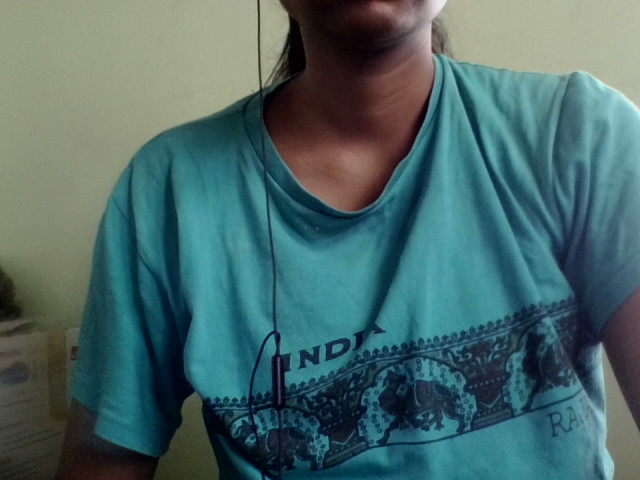

In [34]:
# Load the Captured Image
image = cv2.imread("captured_image.png")
if image is None:
    print(" No Image Captured!")
else:
    print("✅ Image Captured Successfully!")

    # Convert Image to HSV for Color Detection
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Display Image

    from google.colab.patches import cv2_imshow
    cv2_imshow(image)


In [35]:
# Load the Captured Image
image = cv2.imread("captured_image.png")
if image is None:
    print(" No Image Found!")
else:
    print("✅ Image Loaded Successfully!")

    # Convert Image to HSV for Color Detection
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Get the center pixel hue value
    h, w, _ = image.shape
    center_hue = hsv_image[h//2, w//2][0]

    # Detect Color
    detected_color = "Unknown"
    for color, (lower, upper) in hue_ranges.items():
        if lower <= center_hue <= upper:
            detected_color = color
            break

    print(f"Detected Color: {detected_color}")

✅ Image Loaded Successfully!
Detected Color: Gray


In [36]:
gender = input("Enter gender (Male/Female): ").strip().capitalize()
if gender not in ["Male", "Female"]:
    print("Invalid input. Defaulting to 'Male'.")
    gender = "Male"

# Function to Predict Clothing Type
def predict_clothing(img):
    img = cv2.resize(img, (224, 224))  # Resize to match model input
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict Clothing Type
    predictions = model.predict(img)
    # Check if index is within bounds before accessing the list
    predicted_index = np.argmax(predictions)
    predicted_class = class_labels[gender][predicted_index] if predicted_index < len(class_labels[gender]) else "Unknown"
    print(f"Predicted Class Label: {predicted_class}")

    return predicted_class

Enter gender (Male/Female): Female


In [37]:
def predict_clothing(img):
    img = cv2.resize(img, (224, 224))  # Resize to match model input
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict(img)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Ensure the predicted class index is within the bounds of the label list
    predicted_class_index = min(predicted_class_index, len(class_labels[gender]) - 1)

    predicted_class = class_labels[gender][predicted_class_index]  # Use gender-specific labels
    return predicted_class

In [38]:
image = cv2.imread("captured_image.png")

if image is None:
    print("Error: Could not read the image. Check the path.")
else:
    h, w, _ = image.shape  # Get image dimensions

    # Crop Center Region for Clothing Detection
    clothing_region = image[h//2-100:h//2+100, w//2-100:w//2+100]
    detected_clothing = predict_clothing(clothing_region)

    print(f"\nDetected Clothing Type:{detected_clothing}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step

Detected Clothing Type:Women_Pants


In [39]:
def get_weather_type(temp, condition):
    if temp >= 30:
        return "Hot & Sunny"
    elif condition in ["Rain", "Drizzle", "Thunderstorm"]:
        return "Rainy"
    elif 15 <= temp < 30 and condition in ["Clouds", "Partly Cloudy", "Clear"]:
        return "Mild & Pleasant"
    elif 5 <= temp < 15 and condition in ["Wind", "Breeze", "Fog"]:
        return "Windy"
    else:
        return "Mild & Pleasant"  # default fallback

def get_weather(city):
    params = {"q": city, "appid": API_KEY, "units": "metric"}
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        data = response.json()
        temperature = data["main"]["temp"]
        weather_condition = data["weather"][0]["main"]
        print(f"\n Temperature: {temperature}°C")
        print(f"Weather Condition: {weather_condition}")
        weather_type = get_weather_type(temperature, weather_condition)
        return weather_type
    else:
        print(" Could not fetch weather data.")
        return None

def suggest_outfit(detected_color, detected_clothing, weather_type):
    matching_colors = color_combinations.get(detected_color, ["Black", "White"])
    suggested_color = random.choice(matching_colors)
    try:
        suggested_clothes = outfit_suggestions[weather_type][detected_clothing]
    except KeyError:
        suggested_clothes = outfit_suggestions.get(detected_clothing, ["Pants", "Shoes"])
    return suggested_color, suggested_clothes


city = input(" Enter the city you are visiting: ")
weather_type = get_weather(city)

if weather_type:
    print(f"\nWeather Type: {weather_type}")

    # Suggest based on detected clothing and weather
    suggested_color, suggested_clothes = suggest_outfit(detected_color, detected_clothing, weather_type)
    clothing_items = ", ".join(suggested_clothes)

    print(f"\nSuggested Outfit for {detected_clothing} ({detected_color})")
    print(f"Suitable Color Combination: {suggested_color}")
    print(f"Matching Clothing Items for {weather_type}: {clothing_items}")

📍 Enter the city you are visiting: Jaipur

🌡️ Temperature: 33.62°C
☁️ Weather Condition: Haze

🌍 Weather Type: Hot & Sunny

👗 **Suggested Outfit for Women_Pants (Gray)**
🎨 Suitable Color Combination: Black
🧥 Matching Clothing Items for Hot & Sunny: Tank Top, Slides


In [42]:
suggested_color, suggested_items = suggest_outfit(detected_color, detected_clothing,weather_type)

# Format detected clothing
clean_detected = detected_clothing.replace("Women_", "").replace("Men_", "").replace("_", " ").lower()

# Format suggested items with their color
suggested_parts = [f"{suggested_color.lower()} {item.lower()}" for item in suggested_items]


In [ ]:
# Convert Outfit Suggestion to a Prompt for AI Image Generation
prompt = prompt = (
    f"A mannequin wearing a {detected_color.lower()} {clean_detected} with "
    f"{' and '.join(suggested_parts)}, fashion studio lighting, modern catalog style."
)

# Generate Image
image = pipe(prompt).images[0]

# Show & Save Image
image.show()
image.save("outfit_suggestion.png")

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import os
import glob
from google.colab import files

# Upload files to Colab environment
uploaded = files.upload()

# Create a directory to store the uploaded files (if it doesn't exist)
image_folder = "uploaded_images"
os.makedirs(image_folder, exist_ok=True)

# Move uploaded files to the directory
for filename in uploaded.keys():
    os.rename(filename, os.path.join(image_folder, filename))

# Now you can access the images using the image_folder path
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))] # Get image names

ground_truth_labels = {
    "image1.jpg": ("Blue", "Women_Pants"),
    "image2.jpg": ("Black", "Women_Tops"),
    "image3.jpg": ("Orange", "Women_Blouse_Shirts"),
    "image4.jpg": ("Blue", "WOmen_Graphic_tees"),
    "image5.jpg": ("Pink", "Women_Sweaters"),
    "image6.jpg": ("Blue", "Women_Pants"),
    "image7.jpg": ("Yellow", "Women_Tops"),
    "image8.jpg": ("Pink", "Women_Pants"),
    "image9.jpg": ("White", "Women_Pants"),
    "image10.jpg": ("Blue", "Women_Dresses"),
}

# Function to Detect Clothing Color
def detect_color(image):
    """Detects the dominant color in the image using HSV values."""
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    center_hue = hsv_image[hsv_image.shape[0] // 2, hsv_image.shape[1] // 2][0]

    detected_color = "Unknown"
    for color, (lower, upper) in hue_ranges.items():
        if lower <= center_hue <= upper:
            detected_color = color
            break
    return detected_color

#  Function to Predict Clothing Type
def predict_clothing(image):
    """Preprocess the image and predict the clothing category."""
    img = cv2.resize(image, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    predictions = model.predict(img)
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Check if the index is within the valid range for the selected gender
    num_classes = len(class_labels[gender])  # Assuming 'gender' is defined before calling this function
    if predicted_class_index >= num_classes:
        print(f"⚠️ Warning: Predicted class index ({predicted_class_index}) is out of range for gender '{gender}'. Using index 0 instead.")
        predicted_class_index = 0  # Or handle the out-of-range index in a more appropriate way

    predicted_class = class_labels[gender][predicted_class_index]  # Use gender-specific labels
    return predicted_class

# Store Predictions & Ground Truth for Evaluation
y_true = []
y_pred = []

# Process Each Image & Compare Results
for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    image = cv2.imread(img_path)

    if image is None:
        print(f" Error loading image: {img_name}")
        continue

    detected_color = detect_color(image)
    detected_clothing = predict_clothing(image)

    # Get Ground Truth for Comparison
    true_color, true_clothing = ground_truth_labels.get(img_name, ("Unknown", "Unknown"))

    # Store Results for Accuracy Calculation
    y_true.append(f"{true_color}_{true_clothing}")
    y_pred.append(f"{detected_color}_{detected_clothing}")

    # Print Results for Each Image
    print(f"\n Image: {img_name}")
    print(f" Detected Color: {detected_color}  True Color: {true_color}")
    print(f" Detected Clothing: {detected_clothing}   True Clothing: {true_clothing}")

# Compute Accuracy Metrics
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print Final Evaluation
print(f"\n Overall Accuracy: {accuracy:.2f}")
print("\n Classification Report:\n", report)
print("\n Confusion Matrix:\n", conf_matrix)


Saving image4.jpg to image4.jpg
Saving image7.jpg to image7.jpg
Saving image10.jpg to image10.jpg
Saving image6.jpg to image6.jpg
Saving image2.jpg to image2.jpg
Saving image9.jpg to image9.jpg
Saving image8.jpg to image8.jpg
Saving image3.jpg to image3.jpg
Saving image5.jpg to image5.jpg
Saving image1.jpg to image1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step

 Image: image8.jpg
 Detected Color: Pink  True Color: Pink
 Detected Clothing: Women_Pants   True Clothing: Women_Pants
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step

 Image: image6.jpg
 Detected Color: Blue  True Color: Blue
 Detected Clothing: Women_Pants   True Clothing: Women_Pants
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step

 Image: image10.jpg
 Detected Color: Blue  True Color: Blue
 Detected Clothing: Women_Dresses   True Clothing: Women_Dresses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

 Image: image5.jpg
 Detected Color: Pink  True Color: Pink
 Detected Clothing: Women_Sweaters   True Clothing: Women_Sweaters
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


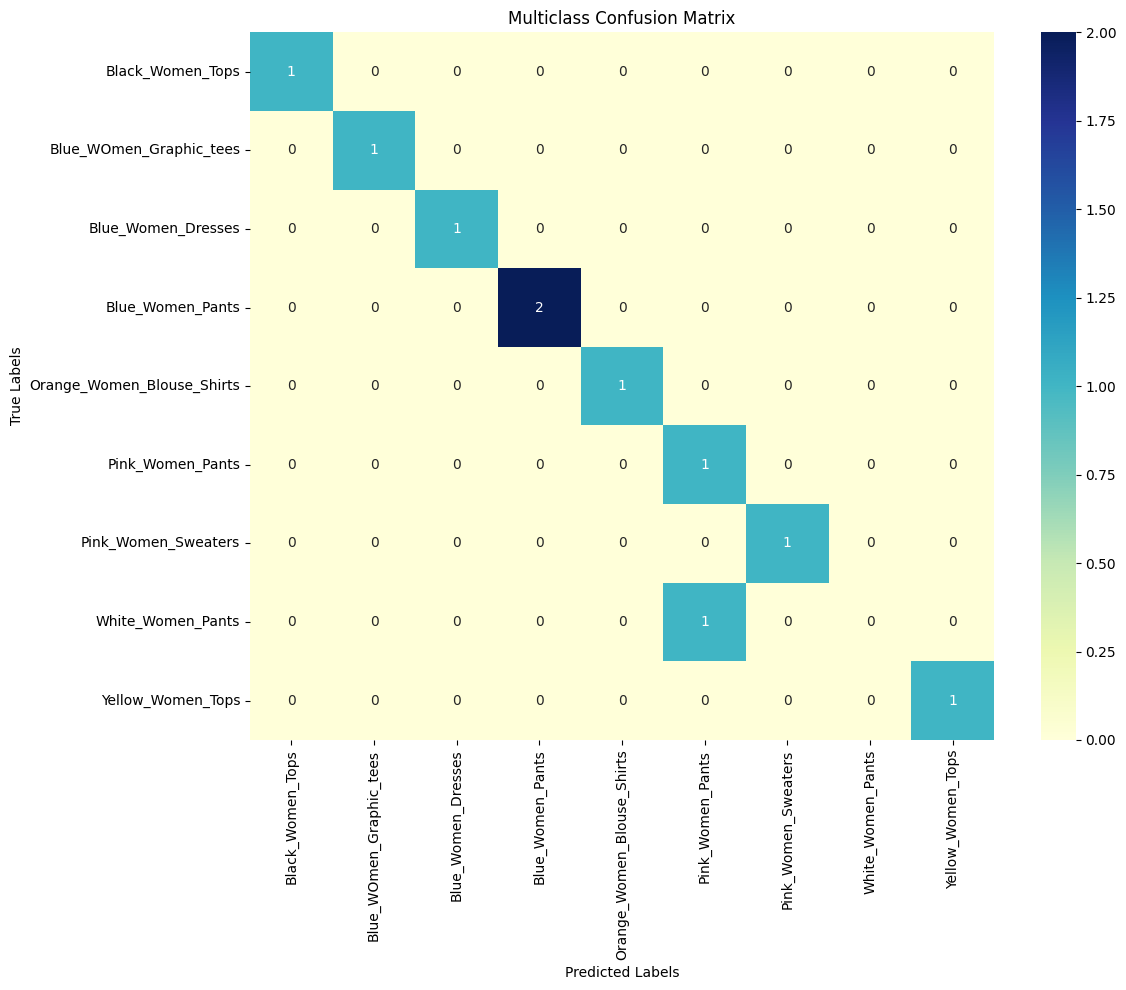

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Unique class labels
unique_labels = sorted(list(set(y_true + y_pred)))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=unique_labels)

# Plot the multiclass confusion matrix as heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Multiclass Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


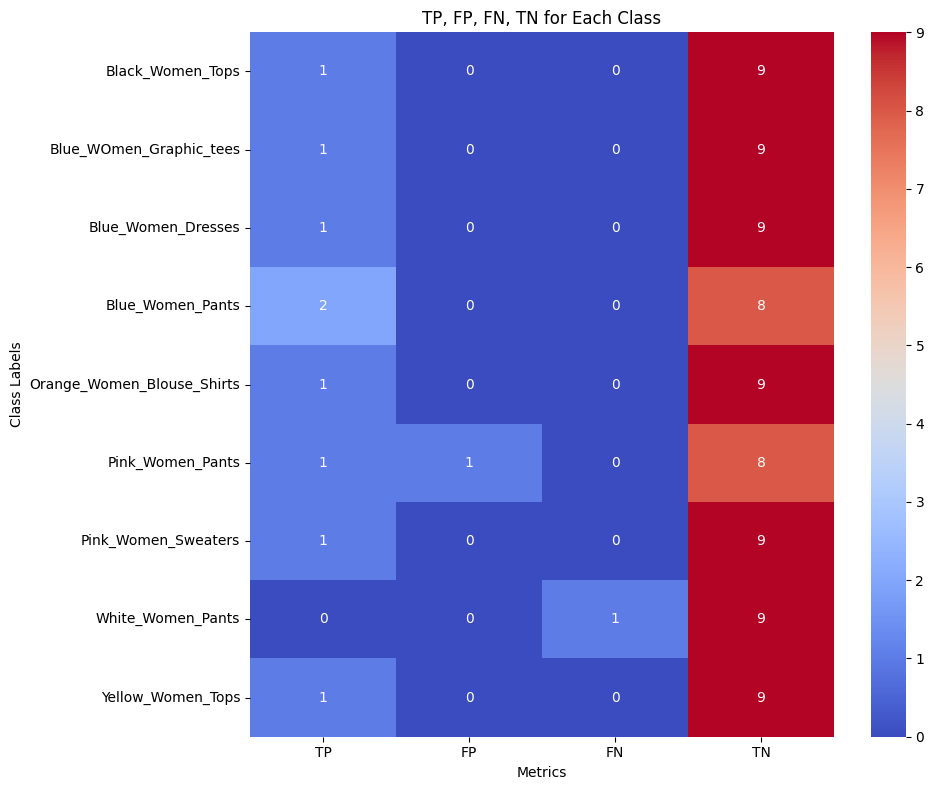

In [ ]:
# Function to compute TP, FP, FN, TN for each class
def compute_conf_matrix_metrics(cm):
    metrics = {}
    for idx, label in enumerate(unique_labels):
        TP = cm[idx, idx]
        FP = np.sum(cm[:, idx]) - TP
        FN = np.sum(cm[idx, :]) - TP
        TN = np.sum(cm) - (TP + FP + FN)
        metrics[label] = {"TP": TP, "FP": FP, "FN": FN, "TN": TN}
    return metrics

metrics_per_class = compute_conf_matrix_metrics(cm)

# Create DataFrame from metrics
import pandas as pd
metrics_df = pd.DataFrame(metrics_per_class).T  # Transpose for better display

# Plot as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(metrics_df, annot=True, fmt='d', cmap='coolwarm')
plt.title('TP, FP, FN, TN for Each Class')
plt.xlabel("Metrics")
plt.ylabel("Class Labels")
plt.tight_layout()
plt.show()
